In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import dates
from matplotlib import ticker
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import pandapower as pp
import os

In [2]:
os.chdir('/home/brendan/PhD/Python Scripts/ThesisGit/Dist Network Simulations')

In [3]:
sns.set(font_scale=1.35, rc={'figure.figsize':(12,5)})
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
matplotlib.rcParams['font.family'] = 'Abyssinica SIL'

In [44]:
sbrc_a = pd.read_csv('Results/SBRC-A_perturb_P.csv', index_col=0)
sbrc_a.index = pd.to_datetime(sbrc_a.index, format='%Y-%m-%d %H:%M:%S')
sbrc_a['load'] = np.linspace(-10000,10000, num=288)
sbrc_a['dvdp'] = sbrc_a['DR_Va']/sbrc_a['Delta_P']

In [45]:
sbrc_b = pd.read_csv('Results/SBRC-B_perturb_P.csv', index_col=0)
sbrc_b.index = pd.to_datetime(sbrc_b.index, format='%Y-%m-%d %H:%M:%S')
sbrc_b['load'] = np.linspace(-10000,10000, num=288)
sbrc_b['dvdp'] = sbrc_b['DR_Va']/sbrc_b['Delta_P']

In [46]:
sbrc_c = pd.read_csv('Results/SBRC-C_perturb_P.csv', index_col=0)
sbrc_c.index = pd.to_datetime(sbrc_c.index, format='%Y-%m-%d %H:%M:%S')
sbrc_c['load'] = np.linspace(-10000,10000, num=288)
sbrc_c['dvdp'] = sbrc_c['DR_Va']/sbrc_c['Delta_P']

In [47]:
drh = pd.read_csv('Results/DRH_perturb_P.csv', index_col=0)
drh.index = pd.to_datetime(drh.index, format='%Y-%m-%d %H:%M:%S')
drh['load'] = np.linspace(-10000,10000, num=288)
drh['dvdp'] = drh['DR_Va']/drh['Delta_P']

In [48]:
ifh = pd.read_csv('Results/IFH_perturb_P.csv', index_col=0)
ifh.index = pd.to_datetime(ifh.index, format='%Y-%m-%d %H:%M:%S')
ifh['load'] = np.linspace(-10000,10000, num=288)
ifh['dvdp'] = ifh['DR_Va']/ifh['Delta_P']

In [73]:
reg = pd.read_csv('Results/DRH_rgression_y_test_prediction.csv')

In [96]:
os.chdir('/home/brendan/PhD/Python Scripts/ThesisGit/Time Series Plots')

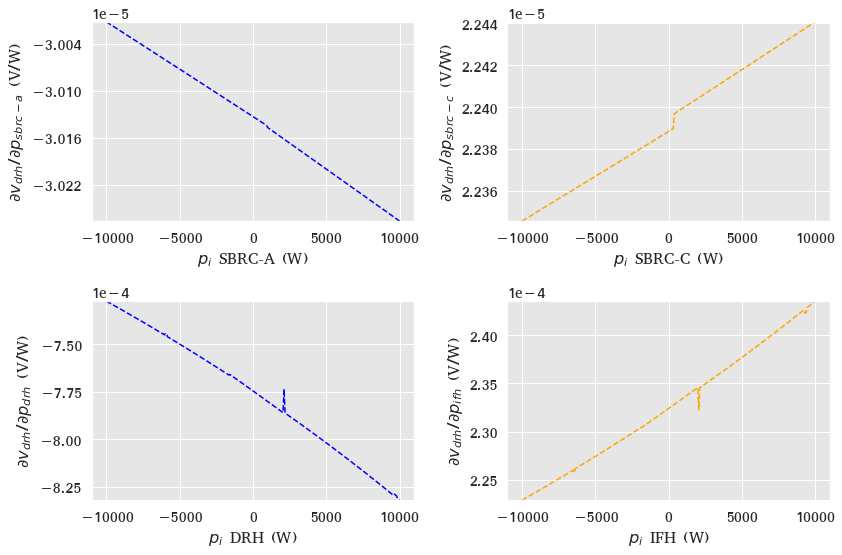

In [97]:
df_thermal=ifh.copy()

fig, ax1 = plt.subplots(2,2)

#ax1.xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))

ax1[0,0].set_xlabel('$p_i$ SBRC-A (W)')
ax1[0,0].set_ylabel(r'$\partial {v_{drh}}$/$\partial {p_{sbrc-a}}$ (V/W)')
ax1[0,0].yaxis.set_major_locator(ticker.MaxNLocator(5))
ax1[0,0].plot(sbrc_a['load'], sbrc_a['dvdp'], label='Power', lw=1.5, color='blue', linestyle='--')
#ax1[0,0].set_xlim(-200,200)

ax1[0,1].set_xlabel('$p_i$ SBRC-C (W)')
ax1[0,1].set_ylabel(r'$\partial {v_{drh}}$/$\partial {p_{sbrc-c}}$ (V/W)')
ax1[0,1].yaxis.set_major_locator(ticker.MaxNLocator(5))
ax1[0,1].plot(sbrc_c['load'], sbrc_c['dvdp'], label='Power', lw=1.5, color='orange', linestyle='--')
#ax1[0,1].set_xlim(-200,200)

ax1[1,0].set_xlabel('$p_i$ DRH (W)')
ax1[1,0].set_ylabel(r'$\partial {v_{drh}}$/$\partial {p_{drh}}$ (V/W)')
ax1[1,0].yaxis.set_major_locator(ticker.MaxNLocator(5))
ax1[1,0].ticklabel_format(axis='y', style='sci',scilimits=(0,0))
ax1[1,0].plot(drh['load'], drh['dvdp'], label='Power', lw=1.5, color='blue', linestyle='--')
#ax1[1,0].set_xlim(-200,200)

ax1[1,1].set_xlabel('$p_i$ IFH (W)')
ax1[1,1].set_ylabel(r'$\partial {v_{drh}}$/$\partial {p_{ifh}}$ (V/W)')
ax1[1,1].yaxis.set_major_locator(ticker.MaxNLocator(5))
ax1[1,1].ticklabel_format(axis='y', style='sci',scilimits=(0,0))
ax1[1,1].plot(ifh['load'], ifh['dvdp'], label='Power', lw=1.5, color='orange', linestyle='--')
#ax1[1,1].set_xlim(-200,200)


ax1[0,0].autoscale(enable=True, axis='y', tight=True)
ax1[0,1].autoscale(enable=True, axis='y', tight=True)
ax1[1,0].autoscale(enable=True, axis='y', tight=True)
ax1[1,1].autoscale(enable=True, axis='y', tight=True)


fig.set_figheight(8)
fig.set_figwidth(12)# otherwise the right y-label is slightly clipped

fig.tight_layout()

plt.savefig(f'Figures/DRH_sensitivites.pdf', bbox_inches='tight')
plt.show()

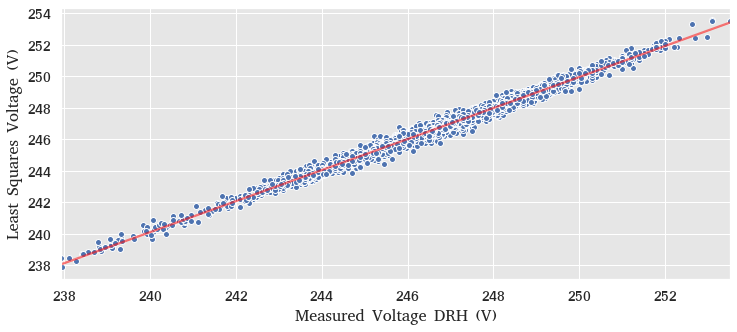

In [99]:
ax = sns.regplot(x=reg['y_test'], y=reg['predictions'],
           line_kws={"color": "red", "alpha":0.5},
           scatter_kws={"alpha":0.99, 'edgecolor':'white'})
ax.set(xlabel='Measured Voltage DRH (V)', ylabel='Least Squares Voltage (V)')
plt.savefig('Figures/drh_senstivity_regression.pdf', bbox_inches='tight')
plt.show()

# Average sensitivites

In [100]:
sbrc_a['dvdp'].mean()

-3.0136171464988672e-05

In [101]:
sbrc_c['dvdp'].mean()

2.2392350589816955e-05

In [102]:
ifh['dvdp'].mean()

0.0002326282994274725

In [103]:
drh['dvdp'].mean()

-0.0007762157351604937